Challenge Set 4  
Topic:        Linear Learning  
Date:         07/22/2016  
Name:         Brian Cocolicchio 

**Challenge 1** Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

    quadratic (second degree polynomial)
    logarithmic (log(x))

(The second one should fit really well, since it has the same form as the underlying model!)

In [31]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import patsy
import statsmodels.formula.api as sm
import seaborn as sn

b0 = 3
b1 = 1
x = list(range(1,100))
eps = np.random.normal(0,1)
y = b0 + b1*np.log10(x)+eps
df = pd.DataFrame()
df['x'] = x
df['y']= y
df.reset_index()
df

quad = sm.ols('y~I(x**2)',data=df).fit()
print(quad.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     149.5
Date:                Mon, 25 Jul 2016   Prob (F-statistic):           2.33e-21
Time:                        23:17:03   Log-Likelihood:                -3.7934
No. Observations:                  99   AIC:                             11.59
Df Residuals:                      97   BIC:                             16.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9326      0.038     76.341      0.0

In [3]:
logMod= sm.ols('y~np.log10(x)',data=df).fit()
print(logMod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.444e+31
Date:                Mon, 25 Jul 2016   Prob (F-statistic):               0.00
Time:                        21:51:07   Log-Likelihood:                 3301.2
No. Observations:                  99   AIC:                            -6598.
Df Residuals:                      97   BIC:                            -6593.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       2.8761   3.29e-16   8.75e+15      

**Challenge 2** Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

In [8]:
from sklearn.metrics import mean_squared_error
b0 = 3
b1 = 1
b2 = 2

x = pd.Series(range(1,100))
eps = np.random.normal(0,1)
y = b0 + b1*x + b2*(x**2) + eps
df2 = pd.DataFrame()
df2['x'] = x
df2['y']= y
df2.reset_index()
df2.head(n=10)

,x,y
0,1,6.769087
1,2,13.769087
2,3,24.769087
3,4,39.769087
4,5,58.769087
5,6,81.769087
6,7,108.769087
7,8,139.769087
8,9,174.769087
9,10,213.769087


In [14]:
from sklearn.cross_validation import train_test_split
train = df2.sample(frac=0.8, random_state=1)
test = df2.loc[~df2.index.isin(train.index)]
mod2 = sm.ols('y ~ x + I(x**2)',data= train).fit()
print(mod2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.273e+31
Date:                Mon, 25 Jul 2016   Prob (F-statistic):               0.00
Time:                        21:59:38   Log-Likelihood:                 1885.7
No. Observations:                  79   AIC:                            -3765.
Df Residuals:                      76   BIC:                            -3758.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.7691   4.04e-12   9.32e+11      0.0

In [15]:
mod2test = sm.ols('y ~ x + I(x**2)',data= test).fit()
print(mod2test.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.949e+29
Date:                Mon, 25 Jul 2016   Prob (F-statistic):          8.29e-248
Time:                        22:00:18   Log-Likelihood:                 471.74
No. Observations:                  20   AIC:                            -937.5
Df Residuals:                      17   BIC:                            -934.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.7691   9.21e-12   4.09e+11      0.0

In [23]:
print(mean_squared_error(test['y'],mod2test.fittedvalues))
print(mean_squared_error(train['y'],mod2.fittedvalues))
print('The MSE for the training data set is:', mod2.mse_total)
print('The MSE for the test data set is:', mod2test.mse_total)

1.90536179572e-22
1.08385855074e-22
The MSE for the training data set is: 36765165.5696
The MSE for the test data set is: 23476236.3158


Something is not right here.

**Challenge 3** For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

    training error
    test error
    R squared
    AIC


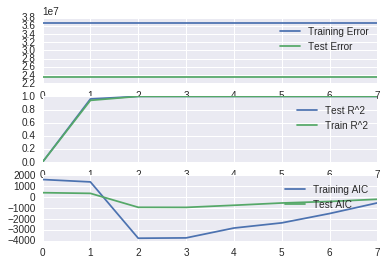

In [40]:
modConst = sm.ols('y ~ 1',data= test).fit()
modOne =sm.ols('y ~ x',data= test).fit()
mod2test = sm.ols('y ~ x + I(x**2)',data= test).fit()
modThree = sm.ols('y ~ x + I(x**2)+ I(x**3)',data= test).fit()
modFour = sm.ols('y ~ x + I(x**2)+ I(x**3) + I(x**4)',data= test).fit() 
modFive = sm.ols('y ~ x + I(x**2)+ I(x**3) + I(x**4) + I(x**5)',data= test).fit()
modSix = sm.ols('y ~ x + I(x**2)+ I(x**3) + I(x**4) + I(x**5)+I(x**6)',data= test).fit()
modSeven = sm.ols('y ~ x + I(x**2)+ I(x**3) + I(x**4) + I(x**5)+I(x**6) + I(x**7)',data = test).fit()

mod0 = sm.ols('y ~ 1',data= train).fit()
mod1 =sm.ols('y ~ x',data= train).fit()
mod2 = sm.ols('y ~ x + I(x**2)',data= train).fit()
mod3 = sm.ols('y ~ x + I(x**2)+ I(x**3)',data= train).fit()
mod4 = sm.ols('y ~ x + I(x**2)+ I(x**3) + I(x**4)',data= train).fit() 
mod5 = sm.ols('y ~ x + I(x**2)+ I(x**3) + I(x**4) + I(x**5)',data= train).fit()
mod6 = sm.ols('y ~ x + I(x**2)+ I(x**3) + I(x**4) + I(x**5)+I(x**6)',data= train).fit()
mod7 = sm.ols('y ~ x + I(x**2)+ I(x**3) + I(x**4) + I(x**5)+I(x**6) + I(x**7)',data = train).fit()

modDeg = [0,1,2,3,4,5,6,7]
trainErr = [mod0.mse_total,mod1.mse_total,mod2.mse_total,mod3.mse_total, mod4.mse_total, mod5.mse_total, mod6.mse_total, mod7.mse_total]
testErr = [modConst.mse_total, modOne.mse_total, mod2test.mse_total, modThree.mse_total, modFour.mse_total, modFive.mse_total, modSix.mse_total, modSeven.mse_total]

rsqTest = [modConst.rsquared, modOne.rsquared, mod2test.rsquared, modThree.rsquared, modFour.rsquared, modFive.rsquared, modSix.rsquared, modSeven.rsquared]
rsqTrain = [mod0.rsquared, mod1.rsquared, mod2.rsquared, mod3.rsquared, mod4.rsquared, mod5.rsquared, mod6.rsquared,mod7.rsquared]

AICTest = [modConst.aic, modOne.aic, mod2test.aic,modThree.aic, modFour.aic, modFive.aic, modSix.aic, modSeven.aic]
AICTrain = [mod0.aic, mod1.aic, mod2.aic, mod3.aic,mod4.aic, mod5.aic, mod6.aic, mod7.aic]
  
%matplotlib inline
fig = plt.figure()
plt.subplot(311)
plt.plot(modDeg,trainErr,label ='Training Error')
plt.plot(modDeg,testErr,label = 'Test Error')
plt.legend()

plt.subplot(312)
plt.plot(modDeg,rsqTest,label ='Test R^2')
plt.plot(modDeg,rsqTrain,label = 'Train R^2')
plt.legend()

plt.subplot(313)
plt.plot(modDeg,AICTrain,label ='Training AIC')
plt.plot(modDeg,AICTest,label = 'Test AIC')
plt.legend()
plt.show()


** Challenge 4** For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.